In [1]:

import torch
import torchvision
from torch import nn 
#from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image 
import numpy as np
import random
import dataset_utils
from torch.utils.data import Dataset, DataLoader

In [2]:
df = pd.read_csv('final_dataset.csv',index_col=0)
tform = transforms.Compose([transforms.Resize((64,64)),transforms.PILToTensor(),transforms.ConvertImageDtype(torch.float),transforms.Normalize(0.5,0.5)])
image_dataset = torchvision.datasets.ImageFolder("image_dataset/",transform=tform)
species2genus = dataset_utils.species_label_to_genus_label(df,image_dataset)

In [3]:

batch_size = 1000 
import random
import dataset_utils
img2dna = dataset_utils.get_imgs_bold_id(image_dataset,df)

nucleotides = df[['nucleotide','species_name','genus_name','processid','image_urls']]
colonna_dna = df.loc[:,"nucleotide"]
nucleotides.loc[:,'nucleotide'] = colonna_dna.apply(dataset_utils.one_hot_encoding)
random.seed(42)

X_train_val, X_test, y_train_val, y_test = dataset_utils.data_split(nucleotides,0.2,random_state=42)
print(y_test)
train_data = X_train_val
train_data['species_name'] = y_train_val

X_train, X_validation, y_train, y_validation = dataset_utils.data_split(train_data,0.2,drop_labels=False,random_state=42)
train_indices, val_indices, test_indices = dataset_utils.image_splits_from_df(X_train,X_validation,X_test,image_dataset)
'''from torch.utils.data import Dataset, DataLoader
 
class WholeDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.targets = data.targets#torch.tensor(targets)
        #self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index][0]
        y = self.targets[index]
        
        return x, y
    
    def __len__(self):
        return len(self.data)
        
whole_dataset = WholeDataset(image_dataset)
n_classes = np.unique(whole_dataset.targets).shape[0]
print(len(test_indices+val_indices+train_indices))
len(whole_dataset)

train_imgs = torch.utils.data.Subset(whole_dataset, train_indices)
val_imgs = torch.utils.data.Subset(whole_dataset, val_indices)
test_imgs = torch.utils.data.Subset(whole_dataset, test_indices)
len(train_imgs)+len(val_imgs)+len(test_imgs)
train_loader = torch.utils.data.DataLoader(train_imgs, batch_size=batch_size,shuffle=False, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_imgs, batch_size=2000,shuffle=False, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_imgs, batch_size=4,shuffle=False, num_workers=2)
del test_loader
dataloaders = {"train":train_loader,"val":val_loader}
dataset_sizes = {'train': len(train_imgs.indices), 'val':len(val_imgs.indices)}

described_species_labels = np.array([image_dataset.targets[i] for i in train_indices])
described_species_labels = np.unique(described_species_labels)'''

365    Bembidion normannum
292       Bledius gallicus
321       Praxis edwardsii
352        Andrena pilipes
18     Automeris managuana
              ...         
412         Hemiceras losa
413         Hemiceras losa
417     Hemiceras punctata
418         Hemiceras losa
421     Hemiceras punctata
Name: species_name, Length: 9991, dtype: object


'from torch.utils.data import Dataset, DataLoader\n \nclass WholeDataset(Dataset):\n    def __init__(self, data, transform=None):\n        self.data = data\n        self.targets = data.targets#torch.tensor(targets)\n        #self.transform = transform\n        \n    def __getitem__(self, index):\n        x = self.data[index][0]\n        y = self.targets[index]\n        \n        return x, y\n    \n    def __len__(self):\n        return len(self.data)\n        \nwhole_dataset = WholeDataset(image_dataset)\nn_classes = np.unique(whole_dataset.targets).shape[0]\nprint(len(test_indices+val_indices+train_indices))\nlen(whole_dataset)\n\ntrain_imgs = torch.utils.data.Subset(whole_dataset, train_indices)\nval_imgs = torch.utils.data.Subset(whole_dataset, val_indices)\ntest_imgs = torch.utils.data.Subset(whole_dataset, test_indices)\nlen(train_imgs)+len(val_imgs)+len(test_imgs)\ntrain_loader = torch.utils.data.DataLoader(train_imgs, batch_size=batch_size,shuffle=False, num_workers=2)\nval_load

In [4]:
train_labels = np.array(image_dataset.imgs)[train_indices][:,1].astype(int)
val_labels = np.array(image_dataset.imgs)[val_indices][:,1].astype(int)

In [5]:
val_labels

array([   1,    1,    2, ..., 1049, 1049, 1049])

In [6]:

y_train = y_train.apply(lambda x: image_dataset.class_to_idx[x.replace(' ','_')])
y_test = y_test.apply(lambda x: image_dataset.class_to_idx[x.replace(' ','_')])
y_validation= y_validation.apply(lambda x: image_dataset.class_to_idx[x.replace(' ','_')])
y_train_val = y_train_val.apply(lambda x: image_dataset.class_to_idx[x.replace(' ','_')])

In [7]:
###ROBA NUOVA AAA
n_described_val = 0
n_undescribed_val = 0
for vv in np.unique(y_validation):
    if vv in np.unique(y_train):
        n_described_val +=1
    else:
        n_undescribed_val +=1

print(n_described_val)
print(n_undescribed_val)
n_described_test = 0
n_undescribed_test = 0
for vv in np.unique(y_test):
    if vv in np.unique(y_train_val):
        n_described_test +=1
    else:
        n_undescribed_test +=1

print(n_described_test)
print(n_undescribed_test)

650
132
797
215


In [8]:
class DNAdataset(Dataset):
    def __init__(self, data, targets, transform=None):
        self.data = data
        self.targets = torch.tensor(targets)
        #self.transform = transform
        
    def __getitem__(self, index):
        x = torch.tensor(np.float32(self.data[index][0])).unsqueeze(0)
        y = self.targets[index]
        
        #if self.transform:
        #    x = Image.fromarray(self.data[index].astype(np.uint8).transpose(1,2,0))
        #    x = self.transform(x)
        
        return x, y
    
    def __len__(self):
        return len(self.data)
d_train = DNAdataset(X_train.values, y_train.values)
d_val = DNAdataset(X_validation.values, y_validation.values)
d_train_val = DNAdataset(X_train_val.values, y_train_val.values)
d_test = DNAdataset(X_test.values, y_test.values)

In [9]:
dataloader_train = DataLoader(d_train, batch_size=32,shuffle=True)
dataloader_val = DataLoader(d_val, batch_size=32,shuffle=True)
dataloader_train_val = DataLoader(d_train_val, batch_size=32,shuffle=True)
dataloader_test = DataLoader(d_test, batch_size=32,shuffle=True)
dataloaders = {'train':dataloader_train,'val':dataloader_val,'train_val':dataloader_train_val,'test':dataloader_test}
dataset_sizes = {'train': d_train.data.shape[0], 'val':d_val.data.shape[0],'train_val':d_train_val.data.shape[0],'test':d_test.data.shape[0]}
is_train_val = False
if is_train_val:
    dataloaders['train'] = dataloaders['train_val']
    dataloaders['val'] = dataloaders['test']
    dataset_sizes['train'] = dataset_sizes['train_val']
    dataset_sizes['val'] = dataset_sizes['test']
print("ATTENZIONE A STA ROBA NON DIMENTICARE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")

ATTENZIONE A STA ROBA NON DIMENTICARE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


In [10]:

from tqdm.notebook import tqdm
def fit(epochs,dataloaders,optimizer,model,start_idx=0):
    criterion = torch.nn.CrossEntropyLoss()
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    torch.cuda.empty_cache()
    
    train_losses = []
    train_scores = []
    val_losses = []
    val_scores = []
    for epoch in range(epochs):
        running_train_corrects = 0
        for dnas,labels in tqdm(dataloaders['train']):
            model.train()
            dnas = dnas.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            
            predicted_labels = model(dnas)
            train_loss = criterion(predicted_labels,labels)
            train_loss.backward()
            optimizer.step()
            
            _, preds = torch.max(predicted_labels, 1)
            #print(preds)
            #print(labels.data)
            running_train_corrects += torch.sum(preds == labels.data)
        train_losses.append(train_loss)
        
        running_val_corrects = 0
        for dnas,labels in tqdm(dataloaders['val']):
            
            model.eval()
            with torch.no_grad():
                dnas = dnas.to(device)
                labels = labels.to(device)
                optimizer.zero_grad()
                
                predicted_labels = model(dnas)
                val_loss = criterion(predicted_labels,labels)
                
                _, preds = torch.max(predicted_labels, 1)
                #print(preds)
                #print(labels.data)
                running_val_corrects += torch.sum(preds == labels.data)
        val_losses.append(val_loss)
        
        
        
        #real_scores.append(real_score)
        #fit_p.writer.add_scalar('loss_g', loss_g, epoch)
        # Log losses & scores (last batch)
        
        epoch_train_acc = running_train_corrects.double() / dataset_sizes['train']
        epoch_val_acc = running_val_corrects.double() / dataset_sizes['val']
        print("Epoch [{}/{}], train_loss: {:.4f},  train_score: {:.4f},val_loss: {:.4f},  val_score: {:.4f}".format(
            epoch+1, epochs, train_loss, epoch_train_acc,val_loss,epoch_val_acc))
        #print(f"class accuracy real {class_accuracy_real}")
    
    return train_losses

In [11]:
class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        #self.linear1 = torch.nn.Linear(658, 200)
        self.conv1 = torch.nn.Conv2d(1,64,(5,1))
        self.activation1 = torch.nn.LeakyReLU()
        self.drop1 = torch.nn.Dropout()
        self.norm1 = torch.nn.BatchNorm2d(64)
        self.conv2 = torch.nn.Conv2d(64,16,(5,1))
        self.activation2 = torch.nn.LeakyReLU()
        self.norm2 = torch.nn.BatchNorm2d(16)
        self.drop2 = torch.nn.Dropout()
        self.conv3 = torch.nn.Conv2d(16,8,(5,1))
        self.activation3 = torch.nn.LeakyReLU()
        self.norm3 = torch.nn.BatchNorm2d(8)
        self.drop3 = torch.nn.Dropout()
        self.conv4 = torch.nn.Conv2d(8,1,(5,1))
        self.activation4 = torch.nn.LeakyReLU()
        self.norm4 = torch.nn.BatchNorm2d(1)
        self.drop4 = torch.nn.Dropout()

        self.main = nn.Sequential(self.conv1,self.activation1,self.norm1,self.drop1,
                                  self.conv2,self.activation2,self.norm2,self.drop2,
                                  self.conv3,self.activation3,self.norm3,self.drop3,
                                  self.conv4,self.activation4,self.norm4,self.drop4,
        )
        self.flat = torch.nn.Flatten()
        self.gru = nn.GRU(3210,1000,bidirectional=False)
        self.linear = nn.Linear(1000,1050)
    def forward(self, x):
        #print(x.shape)
        x=self.main(x)
        #print(x.shape)
        x=self.flat(x)
        x,_=self.gru(x)
        x=self.linear(x)
        return x
    def feature_extract(self,x):
        #print(x.shape)
        x=self.main(x)
        x=self.flat(x)
        x0 = x
        x,_=self.gru(x)
        #print(x.shape)
        #print(x0.shape)
        x = torch.cat((x,x0),dim=1)
        return x

tinymodel = TinyModel()
tinymodel.cuda()
 
optimizer = torch.optim.Adam(tinymodel.parameters(),weight_decay=1e-5)


In [12]:
n_params = dataset_utils.count_trainable_parameters(tinymodel);
print(n_params)

13693437


In [13]:
fit(100,dataloaders,optimizer,tinymodel)

  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [1/100], train_loss: 1.9538,  train_score: 0.2753,val_loss: 6.9615,  val_score: 0.3942


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [2/100], train_loss: 0.3991,  train_score: 0.9110,val_loss: 7.1447,  val_score: 0.4661


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [3/100], train_loss: 0.1521,  train_score: 0.9773,val_loss: 6.8179,  val_score: 0.4686


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [4/100], train_loss: 0.2134,  train_score: 0.9860,val_loss: 9.5908,  val_score: 0.4703


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [5/100], train_loss: 0.0190,  train_score: 0.9899,val_loss: 2.7102,  val_score: 0.4702


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [6/100], train_loss: 0.0314,  train_score: 0.9927,val_loss: 5.9591,  val_score: 0.4700


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [7/100], train_loss: 0.0093,  train_score: 0.9939,val_loss: 6.0729,  val_score: 0.4705


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [8/100], train_loss: 0.0239,  train_score: 0.9957,val_loss: 5.1238,  val_score: 0.4703


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [9/100], train_loss: 0.0506,  train_score: 0.9924,val_loss: 8.4340,  val_score: 0.4710


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [10/100], train_loss: 0.0110,  train_score: 0.9950,val_loss: 5.2602,  val_score: 0.4712


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [11/100], train_loss: 0.0064,  train_score: 0.9921,val_loss: 5.2762,  val_score: 0.4712


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [12/100], train_loss: 0.0057,  train_score: 0.9951,val_loss: 7.6119,  val_score: 0.4712


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [13/100], train_loss: 0.0046,  train_score: 0.9957,val_loss: 6.0213,  val_score: 0.4712


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [14/100], train_loss: 0.0191,  train_score: 0.9946,val_loss: 8.5788,  val_score: 0.4712


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [15/100], train_loss: 0.0107,  train_score: 0.9934,val_loss: 6.4533,  val_score: 0.4705


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [16/100], train_loss: 0.0042,  train_score: 0.9934,val_loss: 5.3641,  val_score: 0.4728


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [17/100], train_loss: 0.0309,  train_score: 0.9935,val_loss: 6.6040,  val_score: 0.4739


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [18/100], train_loss: 0.0051,  train_score: 0.9947,val_loss: 6.0062,  val_score: 0.4726


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [19/100], train_loss: 0.0166,  train_score: 0.9941,val_loss: 3.8925,  val_score: 0.4725


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [20/100], train_loss: 0.0645,  train_score: 0.9940,val_loss: 10.2723,  val_score: 0.4730


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [21/100], train_loss: 0.0053,  train_score: 0.9956,val_loss: 3.8669,  val_score: 0.4735


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [22/100], train_loss: 0.0033,  train_score: 0.9953,val_loss: 8.5108,  val_score: 0.4719


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [23/100], train_loss: 0.0011,  train_score: 0.9952,val_loss: 4.6484,  val_score: 0.4737


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [24/100], train_loss: 0.0008,  train_score: 0.9970,val_loss: 2.8825,  val_score: 0.4742


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [25/100], train_loss: 0.0041,  train_score: 0.9947,val_loss: 9.5926,  val_score: 0.4740


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [26/100], train_loss: 0.1373,  train_score: 0.9951,val_loss: 4.0681,  val_score: 0.4732


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [27/100], train_loss: 0.2612,  train_score: 0.9950,val_loss: 2.3153,  val_score: 0.4725


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [28/100], train_loss: 0.0021,  train_score: 0.9937,val_loss: 9.8429,  val_score: 0.4744


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [29/100], train_loss: 0.0017,  train_score: 0.9941,val_loss: 9.4239,  val_score: 0.4746


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [30/100], train_loss: 0.0037,  train_score: 0.9943,val_loss: 7.9724,  val_score: 0.4740


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [31/100], train_loss: 0.0005,  train_score: 0.9964,val_loss: 5.5715,  val_score: 0.4753


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [32/100], train_loss: 0.0037,  train_score: 0.9958,val_loss: 4.5875,  val_score: 0.4744


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [33/100], train_loss: 0.2998,  train_score: 0.9935,val_loss: 4.1825,  val_score: 0.4742


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [34/100], train_loss: 0.0050,  train_score: 0.9965,val_loss: 7.4668,  val_score: 0.4732


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [35/100], train_loss: 0.0414,  train_score: 0.9939,val_loss: 6.0473,  val_score: 0.4749


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [36/100], train_loss: 0.0030,  train_score: 0.9955,val_loss: 6.6784,  val_score: 0.4753


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [37/100], train_loss: 0.0036,  train_score: 0.9960,val_loss: 6.9450,  val_score: 0.4735


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [38/100], train_loss: 0.0204,  train_score: 0.9953,val_loss: 7.5519,  val_score: 0.4751


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [39/100], train_loss: 0.2194,  train_score: 0.9964,val_loss: 4.2355,  val_score: 0.4739


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [40/100], train_loss: 0.0035,  train_score: 0.9935,val_loss: 9.8053,  val_score: 0.4749


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [41/100], train_loss: 0.0031,  train_score: 0.9968,val_loss: 8.1936,  val_score: 0.4753


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [42/100], train_loss: 0.0006,  train_score: 0.9979,val_loss: 6.0503,  val_score: 0.4751


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [43/100], train_loss: 0.2632,  train_score: 0.9953,val_loss: 7.1240,  val_score: 0.4746


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [44/100], train_loss: 0.0076,  train_score: 0.9961,val_loss: 7.0947,  val_score: 0.4742


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [45/100], train_loss: 0.0010,  train_score: 0.9952,val_loss: 8.8010,  val_score: 0.4744


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [46/100], train_loss: 0.0015,  train_score: 0.9949,val_loss: 9.2823,  val_score: 0.4746


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [47/100], train_loss: 0.0009,  train_score: 0.9937,val_loss: 10.1822,  val_score: 0.4740


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [48/100], train_loss: 0.0051,  train_score: 0.9956,val_loss: 10.4783,  val_score: 0.4749


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [49/100], train_loss: 0.0004,  train_score: 0.9967,val_loss: 9.2478,  val_score: 0.4753


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [50/100], train_loss: 0.0282,  train_score: 0.9967,val_loss: 6.1468,  val_score: 0.4740


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [51/100], train_loss: 0.0016,  train_score: 0.9944,val_loss: 12.2899,  val_score: 0.4740


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [52/100], train_loss: 0.0017,  train_score: 0.9949,val_loss: 8.6788,  val_score: 0.4753


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [53/100], train_loss: 0.0019,  train_score: 0.9956,val_loss: 5.2156,  val_score: 0.4740


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [54/100], train_loss: 0.0220,  train_score: 0.9974,val_loss: 9.6588,  val_score: 0.4748


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [55/100], train_loss: 0.0026,  train_score: 0.9945,val_loss: 5.2621,  val_score: 0.4739


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [56/100], train_loss: 0.0024,  train_score: 0.9962,val_loss: 8.4988,  val_score: 0.4742


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [57/100], train_loss: 0.0009,  train_score: 0.9958,val_loss: 6.9529,  val_score: 0.4753


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [58/100], train_loss: 0.0002,  train_score: 0.9951,val_loss: 6.8328,  val_score: 0.4740


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [59/100], train_loss: 0.0002,  train_score: 0.9965,val_loss: 6.1299,  val_score: 0.4751


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [60/100], train_loss: 0.0006,  train_score: 0.9964,val_loss: 8.7195,  val_score: 0.4746


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [61/100], train_loss: 0.0010,  train_score: 0.9950,val_loss: 4.7050,  val_score: 0.4755


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [62/100], train_loss: 0.0015,  train_score: 0.9945,val_loss: 7.2729,  val_score: 0.4749


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [63/100], train_loss: 0.0049,  train_score: 0.9968,val_loss: 7.5607,  val_score: 0.4751


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [64/100], train_loss: 0.0019,  train_score: 0.9975,val_loss: 6.3464,  val_score: 0.4760


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [65/100], train_loss: 0.0048,  train_score: 0.9970,val_loss: 12.9949,  val_score: 0.4751


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [66/100], train_loss: 0.0048,  train_score: 0.9959,val_loss: 8.9486,  val_score: 0.4751


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [67/100], train_loss: 0.0007,  train_score: 0.9965,val_loss: 10.7323,  val_score: 0.4740


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [68/100], train_loss: 0.0014,  train_score: 0.9953,val_loss: 11.6921,  val_score: 0.4735


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [69/100], train_loss: 0.0007,  train_score: 0.9973,val_loss: 6.9775,  val_score: 0.4755


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [70/100], train_loss: 0.0048,  train_score: 0.9960,val_loss: 4.4972,  val_score: 0.4751


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [71/100], train_loss: 0.0017,  train_score: 0.9965,val_loss: 5.6438,  val_score: 0.4753


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [72/100], train_loss: 0.0051,  train_score: 0.9965,val_loss: 7.7591,  val_score: 0.4746


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [73/100], train_loss: 0.0058,  train_score: 0.9949,val_loss: 11.1169,  val_score: 0.4753


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [74/100], train_loss: 0.0003,  train_score: 0.9964,val_loss: 8.1814,  val_score: 0.4758


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [75/100], train_loss: 0.0049,  train_score: 0.9947,val_loss: 9.0420,  val_score: 0.4753


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [76/100], train_loss: 0.2948,  train_score: 0.9958,val_loss: 11.5860,  val_score: 0.4755


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [77/100], train_loss: 0.0174,  train_score: 0.9957,val_loss: 10.6872,  val_score: 0.4744


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [78/100], train_loss: 0.0040,  train_score: 0.9953,val_loss: 8.3263,  val_score: 0.4753


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [79/100], train_loss: 0.0966,  train_score: 0.9965,val_loss: 7.7750,  val_score: 0.4753


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [80/100], train_loss: 0.0075,  train_score: 0.9965,val_loss: 9.2396,  val_score: 0.4739


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [81/100], train_loss: 0.0021,  train_score: 0.9958,val_loss: 6.7979,  val_score: 0.4749


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [82/100], train_loss: 0.0011,  train_score: 0.9949,val_loss: 8.9053,  val_score: 0.4756


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [83/100], train_loss: 0.0017,  train_score: 0.9949,val_loss: 7.8495,  val_score: 0.4749


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [84/100], train_loss: 0.0021,  train_score: 0.9970,val_loss: 4.1972,  val_score: 0.4751


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [85/100], train_loss: 0.0003,  train_score: 0.9956,val_loss: 6.5155,  val_score: 0.4755


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [86/100], train_loss: 0.0795,  train_score: 0.9954,val_loss: 8.7506,  val_score: 0.4755


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [87/100], train_loss: 0.0003,  train_score: 0.9958,val_loss: 7.6210,  val_score: 0.4737


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [88/100], train_loss: 0.0025,  train_score: 0.9954,val_loss: 8.1300,  val_score: 0.4744


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [89/100], train_loss: 0.3943,  train_score: 0.9959,val_loss: 4.2566,  val_score: 0.4751


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [90/100], train_loss: 0.0050,  train_score: 0.9956,val_loss: 9.5177,  val_score: 0.4749


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [91/100], train_loss: 0.0101,  train_score: 0.9952,val_loss: 8.8577,  val_score: 0.4749


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [92/100], train_loss: 0.0290,  train_score: 0.9949,val_loss: 7.1709,  val_score: 0.4751


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [93/100], train_loss: 0.0002,  train_score: 0.9972,val_loss: 5.8424,  val_score: 0.4758


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [94/100], train_loss: 0.0022,  train_score: 0.9962,val_loss: 9.3931,  val_score: 0.4751


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [95/100], train_loss: 0.0005,  train_score: 0.9963,val_loss: 11.2006,  val_score: 0.4753


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [96/100], train_loss: 0.0017,  train_score: 0.9952,val_loss: 8.2181,  val_score: 0.4751


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [97/100], train_loss: 0.0005,  train_score: 0.9972,val_loss: 10.5032,  val_score: 0.4756


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [98/100], train_loss: 0.0017,  train_score: 0.9958,val_loss: 8.4864,  val_score: 0.4755


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [99/100], train_loss: 0.0017,  train_score: 0.9969,val_loss: 8.0690,  val_score: 0.4758


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [100/100], train_loss: 0.0017,  train_score: 0.9961,val_loss: 10.2368,  val_score: 0.4755


[tensor(1.9538, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(0.3991, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(0.1521, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(0.2134, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(0.0190, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(0.0314, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(0.0093, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(0.0239, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(0.0506, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(0.0110, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(0.0064, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(0.0057, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(0.0046, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(0.0191, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(0.0107, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(

In [14]:
torch.cuda.empty_cache()

In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import importlib 
import extract_features
importlib.reload(extract_features)
((expanded_train_dna_features,expanded_train_dna_labels),
 (expanded_val_dna_features,expanded_val_dna_labels), 
 (expanded_test_dna_features,expanded_test_dna_labels)) = extract_features.extract_expanded_dna_features(tinymodel,device,save_to_disk=True)

365    Bembidion normannum
292       Bledius gallicus
321       Praxis edwardsii
352        Andrena pilipes
18     Automeris managuana
              ...         
412         Hemiceras losa
413         Hemiceras losa
417     Hemiceras punctata
418         Hemiceras losa
421     Hemiceras punctata
Name: species_name, Length: 9991, dtype: object


/home/fogliodicarta/Desktop/InsectClassification/extract_features.py:229: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.save(torch.tensor(expanded_train_dna_features),save_name_prefix+'dna_train_features.pt')
/home/fogliodicarta/Desktop/InsectClassification/extract_features.py:230: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.save(torch.tensor(expanded_train_dna_labels),save_name_prefix+'dna_train_labels.pt')
/home/fogliodicarta/Desktop/InsectClassification/extract_features.py:231: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


# parte dopo non usabile perche in questo branch ho diviso una funzione extract features a parte

# Random Forest

In [45]:
train_dna_features = expanded_train_dna_features
val_dna_features = expanded_val_dna_features
train_dna_labels = expanded_train_dna_labels 
val_dna_labels = expanded_val_dna_labels 


In [46]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 

clf = RandomForestClassifier(min_samples_leaf=2,n_jobs=-1)
clf = clf.fit(train_dna_features,train_dna_labels )

In [47]:
train_predicted_labels = clf.predict(train_dna_features)
print(f"Training species accuracy:{np.count_nonzero(train_predicted_labels==train_dna_labels.numpy())/len(train_dna_labels)}")

Training species accuracy:0.9997699210062121


In [48]:
val_predicted_labels= clf.predict(val_dna_features)
print(f"Validation species accuracy:{np.count_nonzero(val_predicted_labels==val_dna_labels.numpy())/len(val_dna_labels)}")

Validation species accuracy:0.4570812365204889


In [49]:

temp_val_predicted_probs = clf.predict_proba(val_dna_features)
val_predicted_probs = np.zeros((len(temp_val_predicted_probs),1050))
for i, cls in enumerate(np.arange(1050)):
    if cls in clf.classes_:
        val_predicted_probs[:, cls] = temp_val_predicted_probs[:, list(clf.classes_).index(cls)]
import math
n_correct_genus = 0
for i in range(len(val_dna_labels)):
    #label_best_specie = val_predicted_probs[i].argmax()
    label_best_specie = val_predicted_labels[i]
    assert(val_predicted_labels[i]==val_predicted_probs[i].argmax())
    genus_of_best_species = species2genus[label_best_specie.item()]
    #species_same_genus = [k for k,v in species2genus.items() if v == genus_of_best_species]
    #reduced_species = val_predicted_probs[i][species_same_genus]
    #normalized_reduced_species = reduced_species/(reduced_species.sum())
    
    real_genus = species2genus[val_dna_labels[i].item()]
    predicted_genus = genus_of_best_species
    if real_genus == predicted_genus:
        n_correct_genus+=1
print(f"Validation genus accuracy: {n_correct_genus/len(val_dna_labels)}")


Validation genus accuracy: 0.7863407620416967


In [50]:
def entropy_per_symbol(v):
    if len(v)==1:
        return 0.0
    entropy = 0 
    n_zeros = 0
    for p in v:
        if p != 0:
            entropy-=p*math.log(p,2)
        else:
            n_zeros +=1
    #print(f"n_zeros:{n_zeros}")
    #FORSE VA TOLTO N_ZEROS DALLA LENGTH
    mean_symbol_entropy = entropy/math.log(len(normalized_reduced_species),2)
    return mean_symbol_entropy

In [51]:

described_species_labels = np.array([image_dataset.targets[i] for i in train_indices])
described_species_labels = np.unique(described_species_labels)
tprs = []
fprs = []
correct_genus_rate = []
correct_species_rate = []
for t in range(0,100,1):
    entropy_threshold = t/100.0
    #print(val_predicted_probs.shape)
    n_undescribed_samples = 0
    n_described_samples = 0
    n_correct_undescribed_samples = 0
    n_correct_described_samples = 0
    n_correct_genus = 0 
    n_correct_species = 0 
    for i in range(len(val_dna_labels)):
        #label_best_specie = val_predicted_probs[i].argmax()
        label_best_specie = val_predicted_labels[i]
        assert(val_predicted_labels[i]==val_predicted_probs[i].argmax())
        genus_of_best_species = species2genus[label_best_specie.item()]
        species_same_genus = [k for k,v in species2genus.items() if v == genus_of_best_species]
        #print(val_labels[i])
        #print(label_best_specie)
        #print(species_same_genus)
        reduced_species = val_predicted_probs[i][species_same_genus]
        normalized_reduced_species = reduced_species/(reduced_species.sum())
        #print(normalized_reduced_species)
        H_s = entropy_per_symbol(normalized_reduced_species)
        #print(H_s)
        #print("Genus" if H_s > entropy_threshold else "Species")
        #input() 
        if val_dna_labels[i].item() in described_species_labels:
            #tn
            n_described_samples +=1
            if H_s < entropy_threshold:
                n_correct_described_samples+=1
                if label_best_specie == val_dna_labels[i]:
                    n_correct_species+=1
        else:
            #tp
            n_undescribed_samples+=1
            if H_s >= entropy_threshold:
                n_correct_undescribed_samples+=1
                real_genus = species2genus[val_dna_labels[i].item()]
                predicted_genus = genus_of_best_species
                if real_genus == predicted_genus:
                    n_correct_genus+=1
            
        
            
    tprs.append(n_correct_undescribed_samples/n_undescribed_samples)#TPR = recall = sensitivity
    fprs.append(1-n_correct_described_samples/n_described_samples)#1-TNR = 1 - specificity
    correct_genus_rate.append(n_correct_genus/n_undescribed_samples)
    correct_species_rate.append(n_correct_species/n_described_samples)

KeyboardInterrupt: 

In [ ]:

plt.plot(fprs,tprs)
plt.xlim([0, 1])
plt.ylim([0, 1])

In [ ]:
fprs[1]

In [ ]:
tprs[1]

In [ ]:
train_dna_labels.shape

In [ ]:
plt.plot(correct_genus_rate)

In [ ]:
plt.plot(correct_species_rate)

In [ ]:
chhh = 12
correct_species_rate[chhh]

In [ ]:
correct_genus_rate[chhh]

In [ ]:
train_dna_features.shape

In [ ]:
for i,row in enumerate(df['image_urls']):
    print(i,sep=" ")
    print(row)
    input()

In [108]:
img2dna[list(img2dna)[38]]


'DIRTT100-14'

In [113]:
(img2dna)


{'image_dataset/Leucania_cruegeri/10ANIC_08059+1288052608.jpg': 'ANICL062-10',
 'image_dataset/Lestica_alata/BC_ZSM_HYM_24216+1440710108.jpg': 'BCHYM11106-15',
 'image_dataset/Liotryphon_punctulatus/BC-ZSM-HYM-27761-D07+1429045164.jpg': 'BCHYM7643-15',
 'image_dataset/Lesmone_formularis/06-SRNP-109430_DHJ609430+1199992320.jpg': 'BLPBC407-07',
 'image_dataset/Lesmone_formularis/07-SRNP-101378_DHJ611342+1174583648.jpg': 'BLPBE439-07',
 'image_dataset/Lesmone_formularis/07-SRNP-106954_DHJ616918+1188495614.jpg': 'BLPCC469-08',
 'image_dataset/Lesmone_formularis/07-SRNP-112250_DHJ622214+1202911152.jpg': 'BLPCI125-08',
 'image_dataset/Lesmone_formularis/07-SRNP-113574_DHJ623538+1204038314.jpg': 'BLPCJ509-08',
 'image_dataset/Lesmone_formularis/08-SRNP-108981-DHJ633045+1364926698.jpg': 'BLPDE146-09',
 'image_dataset/Lesmone_gentilis/12-SRNP-100569-DHJ667502+1344956152.JPG': 'BLPEE570-12',
 'image_dataset/Leucania_comma/IMG_9917+1238606356.JPG': 'CGUKC237-09',
 'image_dataset/Limodromus_assimi

In [15]:
X_test.shape

(9991, 5)

In [18]:
n_

12430

In [173]:
len(np.unique(list(img2dna_indices.values())))

10839

(array([1235., 1246., 1355., 1434., 1079., 1326., 1337., 1478., 1444.,
        1105.]),
 array([    0. ,  3242.3,  6484.6,  9726.9, 12969.2, 16211.5, 19453.8,
        22696.1, 25938.4, 29180.7, 32423. ]),
 <BarContainer object of 10 artists>)

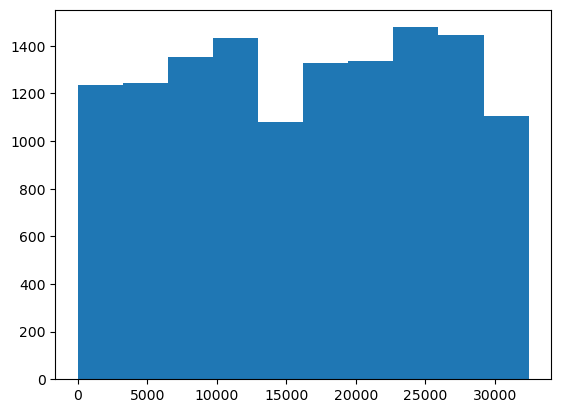

In [176]:

plt.hist(np.unique(list(img2dna_indices.keys())))